In [1]:
import pandas as pd

In [2]:
bike_rentals = pd.read_csv ('bike_rental_hour.csv')
print (bike_rentals.head(3))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  


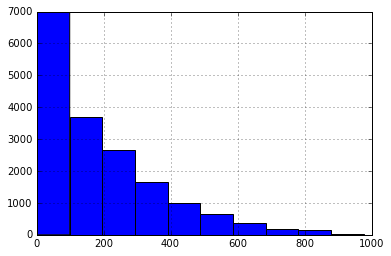

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
bike_rentals['cnt'].hist()

In [4]:
bike_rentals.corr().cnt.sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [5]:
def assign_label (x):
    if x <= 6:
        return 1
    if x <= 12:
        return 2
    if x <= 18:
        return 3
    if x <= 24:
        return 4

In [6]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [7]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [18]:
times = pd.get_dummies(bike_rentals['time_label'], prefix_sep='-', drop_first=True)
hours = pd.get_dummies(bike_rentals['hr'], prefix_sep='-', drop_first=True)

In [35]:
hours.shape

(17379, 23)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
bike_rentals['registered_s'] = scaler.fit_transform (bike_rentals['registered'])

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)

In [23]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label,registered_s
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0.014673
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0.036117
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0.030474
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0.011287
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0.001129


In [38]:
variables = ['cnt', 'hum', 'atemp', 'registered_s']

In [39]:
bike_rentals[variables]

,cnt,hum,atemp,registered_s
0,16,0.81,0.2879,0.014673
1,40,0.80,0.2727,0.036117
2,32,0.80,0.2727,0.030474
3,13,0.75,0.2879,0.011287
4,1,0.75,0.2879,0.001129
5,1,0.75,0.2576,0.001129
6,2,0.80,0.2727,0.000000
7,3,0.86,0.2576,0.002257
8,8,0.75,0.2879,0.007901
9,14,0.76,0.3485,0.006772


In [40]:
df = bike_rentals[variables].join(times, how='inner')
df.shape

(17379, 7)

In [47]:
df.columns

Index(['cnt', 'hum', 'atemp', 'registered_s', 2, 3, 4], dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train, test = train_test_split(df, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [51]:
X = ['hum', 'atemp', 'registered_s', '2', '3', '4']

In [57]:
X_train = train.iloc [:,1:]
X_test = test.iloc [:,1:]

In [58]:
y_train = train['cnt']
y_test = test['cnt']

In [59]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
y_pred = regressor.predict (X_test)

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error (y_test, y_pred)

1316.3837119700993

In [62]:
from sklearn.metrics import r2_score
print (r2_score (y_test, y_pred))
print (r2_score (y_train, regressor.predict(X_train) ))

0.9597308932567554
0.9588033577871512


### Iteration 1 Observations

1. (O) R^2 seems to indicate that selected indicators are arbitrary. = -0.0007388489313369107
2. (O) MSE looks high, though relative to what, nto yet clear. = 32507.239188890453
3. (N) Change predictors to registered and temperature (high correlations).
4. (N) Scale other predictors.
5. (Q) Should hours be a dummy variable?

### Iteration 2 Observations

1. (O) R^2 seems to indicate that selected indicators are highly explanatory. This is for both predictor and train. = 0.9597308932567554
2. (O) MSE is one-third from prior, better = 1316.3837119700993
3. (N) Decision Tree Regression

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [69]:
dregressor = DecisionTreeRegressor(random_state=0, min_samples_leaf=2)
cross_val_score(regressor, X_train, y_train, cv=10)

array([0.96245137, 0.9518784 , 0.95924027, 0.95414268, 0.95448333,
       0.95479714, 0.95617238, 0.96304792, 0.9651884 , 0.96479141])

In [70]:
dregressor.fit (X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [72]:
y_pred_tree =dregressor.predict (X_test)

In [73]:
mean_squared_error (y_test, y_pred_tree)

1525.745737851911